In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [1]:
import os
import json
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. 데이터 불러오고 전처리

In [49]:
%cd /content/drive/MyDrive/'멀티캠퍼스 5조'/2.데이터

df = pd.read_excel('2010-2022 콜택시 운영 상황 변화.xlsx')
df.head(3)

/content/drive/.shortcut-targets-by-id/1Mz49-WiynxJxHmmXYuWSqduV3-jd-BC7/멀티캠퍼스 5조/2.데이터


,년도,차량보유,일평균_접수인원,일평균_탑승인원,탑승률,대당 _일평균_운행횟수,장애인구,평균_대기시간(분),30분_이내_탑승률
0,2010,300.0,2183.0,1925.0,88.2,8.5,414522.0,38.0,52.3
1,2011,300.0,2350.0,2083.0,88.6,8.9,411570.0,31.0,64.5
2,2012,360.0,2525.0,2234.0,88.5,8.9,407528.0,30.0,65.3


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   년도            13 non-null     int64  
 1   차량보유          13 non-null     float64
 2   일평균_접수인원      13 non-null     float64
 3   일평균_탑승인원      13 non-null     float64
 4   탑승률           13 non-null     float64
 5   대당 _일평균_운행횟수  13 non-null     float64
 6   장애인구          13 non-null     float64
 7   평균_대기시간(분)    13 non-null     float64
 8   30분_이내_탑승률    13 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 1.0 KB


### 2. 탐색적 분석(EDA)
- 2.기초통계량추출
- 3.선그래프
- 5.상관관계 분석(피어슨 상관계수) 산점도행렬?

- 1. 잔차해석 : 회귀적합 이후 가능

#### 기초통계량 추출

In [74]:
df.describe()

,년도,차량보유,일평균 접수인원,일평균 탑승인원,탑승률,대당 일평균 운행횟수,장애인구,평균 대기시간(분),30분 이내 탑승률
count,13.00000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2016.00000,449.461538,3359.307692,2878.153846,86.138462,8.661538,398393.769231,36.423077,55.415385
std,3.89444,111.729297,706.153121,540.220764,3.869224,1.139838,8143.908605,10.156784,14.136763
min,2010.00000,300.000000,2183.000000,1925.000000,78.700000,6.400000,391027.000000,26.000000,28.400000
25%,2013.00000,410.000000,2855.000000,2567.000000,84.700000,8.500000,392920.000000,30.000000,50.900000
50%,2016.00000,437.000000,3673.000000,3209.000000,87.400000,8.900000,394190.000000,32.000000,60.700000
75%,2019.00000,437.000000,4005.000000,3276.000000,88.500000,9.400000,403435.000000,38.000000,65.100000
max,2022.00000,634.000000,4185.000000,3484.000000,90.600000,9.900000,414522.000000,58.000000,71.300000


#### Histogram

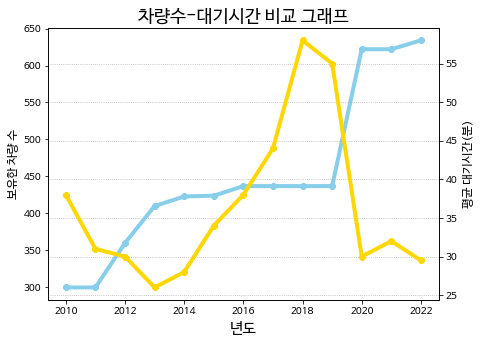

In [63]:
from matplotlib import markers
# 년도별 차량보유 그래프와 평균 대기시간, 30분내 탑승률 선 그래프 겹쳐서 그리기, 마커 0 넣기
# 다중플롯
# 다중 플롯을 지정 : ax1은 y1에 대한 그래프
fig, ax1 = plt.subplots()
fig.set_size_inches((7,5))
ax1.plot('년도', '차량보유','-8', data = df, color = 'skyblue', linewidth = 4, label = '차량대수')
ax1.set_xlabel('년도', fontsize = 15)
ax1.set_ylabel('보유한 차량 수', fontsize = 12)

# ax2는 y2에 대한 그래프, twinx로 x축을 공유
ax2 = ax1.twinx()
ax2.plot('년도', '평균_대기시간(분)','-8', data = df, color = 'gold', linewidth = 4, label = '대기시간')
ax2.set_ylabel('평균_대기시간(분)', fontsize = 12, fontdict = {'rotation':90})

plt.title('차량수-대기시간 비교 그래프', fontsize = 18)
plt.grid(linestyle = ':')
plt.savefig('차량수-대기시간 비교 그래프.png',  bbox_inches='tight')
plt.show()

<Figure size 720x360 with 0 Axes>

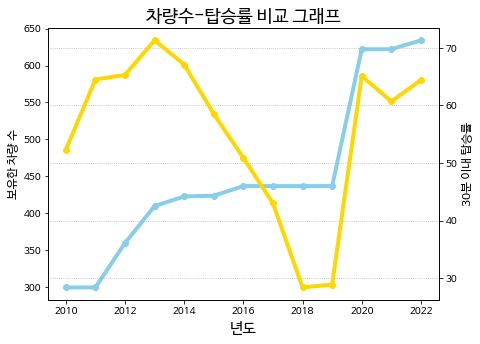

In [64]:
plt.figure(figsize = (10, 5))

fig, ax1 = plt.subplots()
fig.set_size_inches((7,5))
ax1.plot('년도', '차량보유','-8', data = df, color = 'skyblue', linewidth = 4, label = '차량대수')
ax1.set_xlabel('년도', fontsize = 15)
ax1.set_ylabel('보유한 차량 수', fontsize = 12)

ax2 = ax1.twinx()
ax2.plot('년도', '30분_이내)탑승률','-8', data = df, color = 'gold', linewidth = 4, label = '대기시간')
ax2.set_ylabel('30분_이내)탑승률', fontsize = 12, fontdict = {'rotation':90})

plt.title('차량수-탑승률 비교 그래프', fontsize = 18)
plt.grid(linestyle = ':')
plt.savefig('차량수-탑승률 비교 그래프.png',  bbox_inches='tight')
plt.show()

#### 산점도행렬

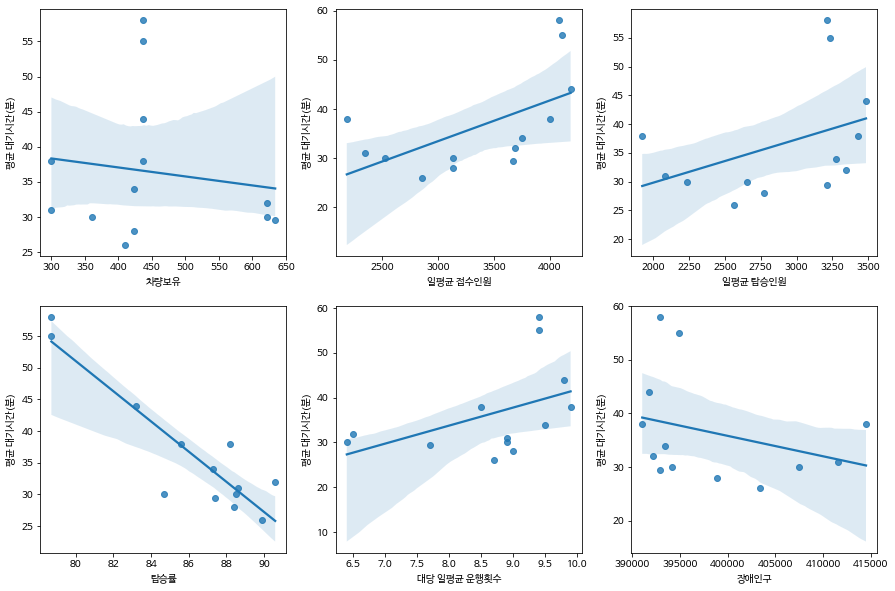

In [4]:
_, ax = plt.subplots(2, 3, figsize = (15, 10))
for i, feature in enumerate(df.columns[1:-2]):
    row, col = i//3, i%3
    sns.regplot(x = feature, y = '평균_대기시간(분)', data = df, ax = ax[row, col]);
plt.savefig('모델1 산점도행렬.png', bbox_inches='tight')

In [80]:
df.columns

Index(['년도', '차량보유', '일평균 접수인원', '일평균 탑승인원', '탑승률', '대당 일평균 운행횟수', '장애인구',
       '평균 대기시간(분)', '30분 이내 탑승률'],
      dtype='object')

In [95]:
# 상관계수 출력
df_cor = df[['차량보유', '일평균_접수인원', '일평균_탑승인원', '대당_일평균 운행횟수', '장애인구',
       '평균_대기시간(분)']].corr().drop(['평균_대기시간(분)'])[['평균_대기시간(분)']].abs()
df_cor[df_cor['평균_대기시간(분)'] > 0.3]

,평균 대기시간(분)
일평균 접수인원,0.575846
일평균 탑승인원,0.400144
대당 일평균 운행횟수,0.450686
장애인구,0.305051


In [5]:
df2 = df.iloc[-4:,:]
df2

,년도,차량보유,일평균 접수인원,일평균 탑승인원,탑승률,대당 일평균 운행횟수,장애인구,평균 대기시간(분),30분 이내 탑승률
9,2019,437.0,4104.0,3230.0,78.7,9.4,394843.0,55.0,28.9
10,2020,622.0,3137.0,2656.0,84.7,6.4,394190.0,30.0,65.1
11,2021,622.0,3692.0,3344.0,90.6,6.5,392123.0,32.0,60.7
12,2022,634.0,3673.0,3209.0,87.4,7.7,392920.0,29.5,64.4


In [6]:
df_cor2 = df2[['차량보유', '일평균_접수인원', '일평균_탑승인원', '대당_일평균_운행횟수', '장애인구',
       '평균_대기시간(분)']].corr().drop(['평균_대기시간(분)'])[['평균_대기시간(분)']].abs()
df_cor2[df_cor2['평균_대기시간(분)'] > 0.3]

,평균 대기시간(분)
차량보유,0.997791
일평균 접수인원,0.778209
일평균 탑승인원,0.301176
대당 일평균 운행횟수,0.880499
장애인구,0.676583


# 다중선형회귀

In [27]:
# 배열로 만들기
X = np.array(df[['차량보유', '일평균_접수인원', '일평균_탑승인원', '대당_일평균_운행횟수', '장애인구']])
y = np.array(df['평균_대기시간(분)'])

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y,test_size= 0.1, random_state=2022
)

In [29]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr.score(X_train, y_train)  # 정확도 

0.9684738101558653

In [31]:
lr.coef_    # 회귀계수

array([-6.55100441e-02,  5.66029158e-02, -4.12124229e-02, -5.89287352e+00,
        9.78869462e-04])

In [32]:
lr.intercept_    # 오차항

-344.4148847587712

In [33]:
X_test

array([[4.10000e+02, 2.85500e+03, 2.56700e+03, 8.70000e+00, 4.03435e+05],
       [4.24000e+02, 3.75100e+03, 3.27600e+03, 9.50000e+00, 3.93380e+05]])

In [34]:
y_test

array([26., 34.])

In [37]:
lr.predict(X_test[0].reshape(1, -1)), lr.predict(X_test[1].reshape(1, -1))

(array([28.17723386]), array([34.19986671]))

In [44]:
r2_lr = r2_score(y_test,lr.predict(X_test))  # 결정계수
r2_lr

0.8506158130843013

In [43]:
mse_lr = mean_squared_error(y_test,lr.predict(X_test)) # mse : 오차제곱평균 = 작을수록 좋음
mse_lr

2.3901469906511776

In [65]:
X_test

array([[4.10000e+02, 2.85500e+03, 2.56700e+03, 8.70000e+00, 4.03435e+05],
       [4.24000e+02, 3.75100e+03, 3.27600e+03, 9.50000e+00, 3.93380e+05]])

In [68]:
df.columns

Index(['년도', '차량보유', '일평균_접수인원', '일평균_탑승인원', '탑승률', '대당_일평균_운행횟수', '장애인구',
       '평균_대기시간', '30분_이내_탑승률'],
      dtype='object')

In [90]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

# residual
res = ols('평균_대기시간 ~ 차량보유 + 일평균_접수인원 + 일평균_탑승인원 + 대당_일평균_운행횟수 + 장애인구', data = (df)).fit()
print(res.summary())

#  P value = P>|t|      : 장애인구만이 pvalue가 0.05보다 높아서 유의미하지 않게 나옴.
#  R-squared            : 결정계수. 데이터가 모형을 얼마나 설명해주는지 알려줌. 그러나 다중회귀분석에서는 수정된 결정계수를 봄.
#  Adj. R-squared       : 수정된 결정계수. 위의 회귀식이 모형을 94.6% 설명할 수 있다.

                            OLS Regression Results                            
Dep. Variable:                평균_대기시간   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     43.24
Date:                Thu, 12 May 2022   Prob (F-statistic):           4.08e-05
Time:                        13:36:15   Log-Likelihood:                -25.557
No. Observations:                  13   AIC:                             63.11
Df Residuals:                       7   BIC:                             66.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -339.3689    209.434     -1.620      

## 잔차해석
- 모형의 선형성  
- 잔차의 정규성 : Q-Q Plot
- 잔차의 등분산성
- 잔차의 독립성


### 4.잔차의 독립성
- 위의 summary에서 확인 가능
- 세 번째 단락의 Durbin-Watson 검정으로 확인
- 1.5 ~ 2.5 사이에 위치시 독립으로 판단.

### 1.모형의 선형성
- 예측값과 잔차를 비교
- 점선에 맞추어 잔차의 추세인 빨간 선이 비슷하게 있어야됨
- 점선에서 크게 벗어날수록 선형성에 위배됨.
- 예측값에 따라 잔차가 크게 다르다는 의미 

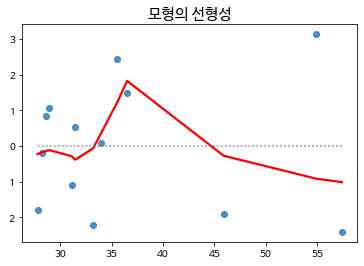

In [95]:
fitted = res.predict(df)
residual = df['평균_대기시간'] - fitted

sns.regplot(fitted, residual, lowess = True, line_kws= {'color' : 'red'})
plt.plot([fitted.min(), fitted.max()], [0,0], ':', color = 'grey')
plt.title('모형의 선형성', fontsize = 15)
plt.show()

### 2.잔차의 정규성
- 잔차가 정규분포를 따른다는 가정
- Q-Q Plot을 통해 확인이 가능하다.
- 정규분포를 따른다면 점들이 점선을 따라 배치됨.

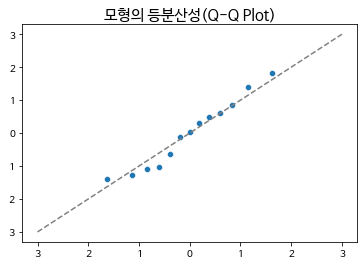

In [96]:
import scipy.stats
sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color = 'grey')
plt.title('모형의 등분산성(Q-Q Plot)', fontsize = 15)
plt.show()

In [97]:
scipy.stats.shapiro(residual)
# (statistic, pvalue)
# pvalue가 0.05보다 크므로 잔차의 정규성을 위반하지 않았음을 확인할 수 있다.

(0.9490301609039307, 0.5836686491966248)

### 3.잔차의 등분산성
- 회귀모형을 통해 예측된 값이 어떻든지 모든 값들에 대하여 잔차의 분산이 동일하다는 가정
- 예측값(X축)에 따라 잔차가 어떻게 달라지는지 보여줌
- 빨간 실선이 수평선에 가까울수록 등분산성이 있다는 의미

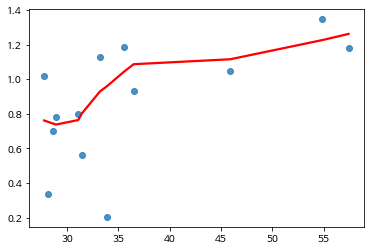

In [98]:
sns.regplot(fitted, np.sqrt(np.abs(sr)), lowess = True, line_kws = {'color' : 'red'})
plt.show()
# .....ㅋ

In [ ]:
# 참고 : https://ysyblog.tistory.com/120